# <font color = "#660000"> REGRESIÓN LINEAL MÚLTIPLE - EJEMPLO

El departamento de personal de una importante corporación industrial quiere desarrollar un modelo para
predecir el sueldo Mensual con base en al número de horas trabajadas por el empleado en el mes y la
edad de sus empleados administrativos. Se selecciona una muestra aleatoria de 16 empleados
administrativos con los resultados que se presentan a continuación:



- Sueldo Mensual (Y)
- Horas laboradas en el mes ($X_1$)
- Edad en años ($X_2$)


|   Y  |  X1 | X2 |
|------|-----|----|
| 4060 | 188 | 22 |
| 4560 | 204 | 29 |
| 5180 | 206 | 34 |
| 5280 | 210 | 36 |
| 5290 | 218 | 37 |
| 5480 | 252 | 39 |
| 5290 | 222 | 25 |
| 5520 | 255 | 42 |
| 5920 | 279 | 45 |
| 6020 | 300 | 46 |
| 6120 | 313 | 47 |
| 5910 | 295 | 42 |
| 6390 | 352 | 51 |
| 6700 | 377 | 53 |
| 6740 | 379 | 54 |
| 7460 | 390 | 58 |


## <font color = "#0F73BD"> Lectura de librerías

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns


import matplotlib.style as style
style.use('bmh')

## <font color = "#0F73BD"> Lectura de Base de Datos

In [2]:
ejemplo = pd.read_stata('Ejemplo_RLM.dta')

In [3]:
print(ejemplo.head())

    x1  x2       y
0  188  22  4060.0
1  204  29  4560.0
2  206  34  5180.0
3  210  36  5280.0
4  218  37  5290.0


## <font color = "#660000"> 1. Diagrama de Dispersión de la variable explicada con cada una de las variables explicativas

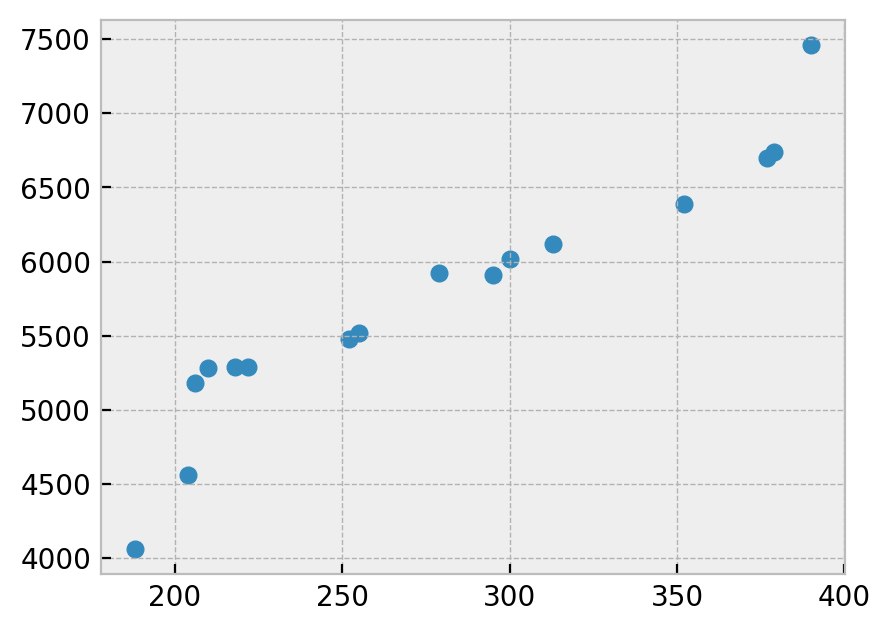

In [4]:
plt.scatter(ejemplo['x1'],ejemplo['y'])

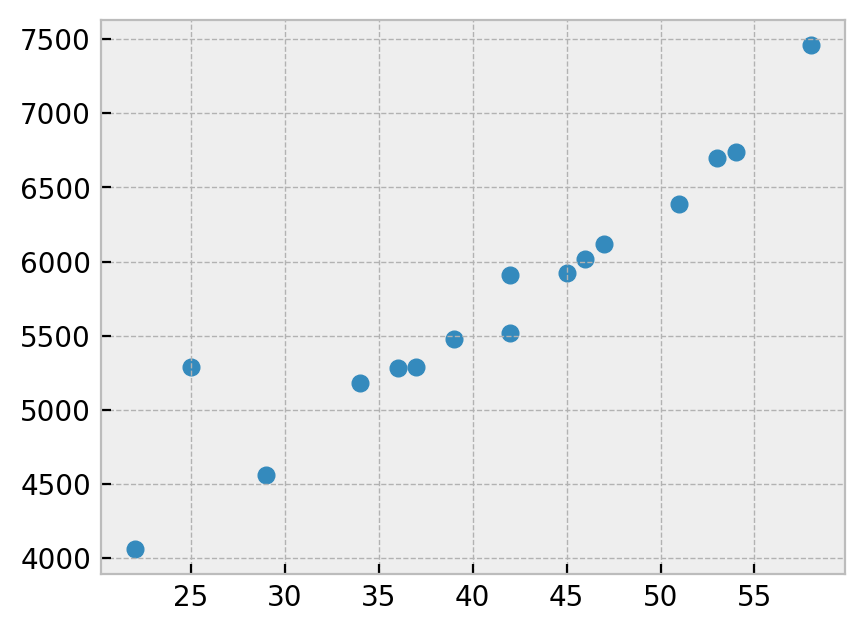

In [5]:
plt.scatter(ejemplo['x2'],ejemplo['y'])

## <font color = "#660000"> 2. Método de los mínimos cuadrados para estimar un modelo de regresión lineal que prediga el salario mensual.

In [6]:
modelo = smf.ols('y ~ x1 + x2', data = ejemplo).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     86.01
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           3.19e-08
Time:                        23:46:23   Log-Likelihood:                -108.87
No. Observations:                  16   AIC:                             223.7
Df Residuals:                      13   BIC:                             226.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2421.6292    260.894      9.282      0.0

/var/mobile/Containers/Data/Application/22BA066D-4B36-4931-9E44-CAF1A9F24C4E/Library/Application Support/com.rationalmatter.junoapp/python-home/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


$$y = 2421.6292 + 5.8803x_1 + 41.0081x_2$$

$\beta_1 = 5.8803$

Por cada hora laboral adicional en el mes el salario mensual se incrementará en 5.88 manteniendo constante la edad.

$\beta_2 = 41.0081$

Por cada año que se incremente la edad del trabajador su salario mensual se incrementará en 41.01 manteniendo constante el número de horas trabajadas en el mes.

## <font color = "#660000"> 3. Análisis de Varianza

### <font color = "#0F73BD"> 1. Planteamiento de Hipótesis
$H_0: \beta_1 = \beta_2=0$

$H_1: \beta_j \neq 0$ Al menos para una $j$

### <font color = "#0F73BD"> 2. Nivel de Significancia: 
$\alpha=0.05$

### <font color = "#0F73BD"> 3. Estadístico de Prueba:

In [17]:
anova_resultados = sm.stats.anova_lm(modelo,typ=2)
print(anova_resultados)

                 sum_sq    df         F    PR(>F)
x1        311628.303434   1.0  5.315207  0.038268
x2        347335.330770   1.0  5.924234  0.030105
Residual  762184.479440  13.0       NaN       NaN


In [7]:
import numpy as np
ejemplo_m = ejemplo.to_numpy()

In [9]:
def anova(x,y):
    uno=np.ones((len(y),1),dtype=np.int)
    X=np.append(uno,x,axis=1)
    XtX=np.dot(np.transpose(X),X)
    Xty=np.dot(np.transpose(X),y)
    B=np.dot(np.linalg.inv(XtX),Xty)
    y_p=np.dot(np.transpose(y),uno)/len(y)
    Syy=np.dot(np.transpose(y),y)- len(y)*(y_p**2)
    SSE=np.dot(np.transpose(y),y)-np.dot(np.transpose(B),Xty)
    SSR=np.dot(np.transpose(B),Xty)-len(y)*(y_p**2)
    n = np.shape(x)[0]
    k = np.shape(x)[1]
    glt = n-k
    gl = n-(k+1)
    total = n-1
    MSE = SSE/(n-(k+1))
    MSR = SSR/k
    F = MSR/MSE
    from scipy.stats import f
    p = 1- f.cdf(F, dfn=k, dfd=gl)
    print ("%30s" % "Análisis de Varianza" ) 
    print (60*"-")
    print ("%10s %8s %12s %10s %5s %8s" % \
    ('Fuente de ', 'gl', 'Suma de ','Cuadrados', 'F','p')) 
    print ("%10s %8s %12s %10s %5s %5s" % \
    ('Variación', ' ', 'Cuadrados','Medios', ' ',' ')) 
    print(60*"-")
    print("%10s %8.0f %10.3f %10.3f %10.3f %8.3f" % ("Regresión ",k,SSR,MSR,F,p))
    print("%10s %8.0f %10.3f %10.3f %10s %10s" % ("Residual ",gl,SSE,MSE, ' ' , ' '))
    print(60*"-")
    print("%10s %8.0f %10.3f %10s %10s %10s" % ("Total ",total,Syy,' ',' ',' '))
    print(60*"-")

In [12]:
anova(ejemplo_m[:,0:2],ejemplo_m[:,2])

          Análisis de Varianza
------------------------------------------------------------
Fuente de        gl     Suma de   Cuadrados     F        p
 Variación             Cuadrados     Medios            
------------------------------------------------------------
Regresión         2 10085015.521 5042507.760     86.012    0.000
 Residual        13 762136.479  58625.883                      
------------------------------------------------------------
    Total        15 10847152.000                                 
------------------------------------------------------------


### <font color = "#0F73BD"> 4. Regla de Decisión:
    
Dado que p = 0.0000 es menor al nivel de significancia (0.05) la hipótesis nula se rechaza. 
    
### <font color = "#0F73BD"> 5. Conclusión:
    
Al menos una variables explicativa Xi se encuentra asociada con Y.

## <font color = "#660000"> 4. Determinación si el N°de horas laboradas se encuentra asociado significativamente al salario.

### <font color = "#0F73BD"> 1. Planteamiento de Hipótesis
$H_0: \beta_1 = 0$

$H_1: \beta_1 \neq 0$

### <font color = "#0F73BD"> 2. Nivel de Significancia: 
$\alpha=0.05$

### <font color = "#0F73BD"> 3. Estadístico de Prueba:

In [13]:
hipotesis = 'x1 = 0'
t_test = modelo.t_test(hipotesis)
print(t_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             5.8803      2.551      2.305      0.038       0.370      11.391


### <font color = "#0F73BD"> 4. Regla de Decisión:
    
Dado que p = 0.0000 es menor al nivel de significancia (0.05) la hipótesis nula se rechaza. 
    
### <font color = "#0F73BD"> 5. Conclusión:
    
El N°de horas laboradas se encuentra asociado significativamente con el salario mensual.

## <font color = "#660000"> 5. Determinación si la edad se encuentra asociado significativamente al salario.

### <font color = "#0F73BD"> 1. Planteamiento de Hipótesis
$H_0: \beta_2 = 0$

$H_1: \beta_2 \neq 0$

### <font color = "#0F73BD"> 2. Nivel de Significancia: 
$\alpha=0.05$

### <font color = "#0F73BD"> 3. Estadístico de Prueba:

In [14]:
hipotesis2 = 'x2 = 0'
t_test2 = modelo.t_test(hipotesis2)
print(t_test2)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            41.0081     16.848      2.434      0.030       4.610      77.406


## <font color = "#660000"> 6. Estimación de intervalo de confianza para los coeficientes e interpretación de resultados. 

### <font color = "#0F73BD"> Para $\beta_1$

$0.370 \leq  \beta_1 \leq 11.391$

Por cada hora laboral adicional en el mes el salario mensual se incrementará entre 0.3701 y 11.3905 con un nivel de confianza del 95%, manteniendo constante la edad.

### <font color = "#0F73BD"> Para $\beta_2$

$4.610 \leq  \beta_2 \leq 77.406$

Por cada año que se incremente la edad del trabajador su salario mensual se incrementará entre 4.6098 y 77.40647 con un nivel de confianza del 95%, manteniendo constante el número de horas trabajadas en el mes

## <font color = "#660000"> 7. Coeficiente de determinación

In [15]:
r2 = modelo.rsquared
print(r2)

0.9297344494947875


El 92.97% de la variabilidad o comportamiento del salario mensual es explicado por el N°de horas laboradas en el mes y la edad del trabajador.